# userto user  model 

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
book_df=pd.read_csv(r'D:\DEBI_DATA_SCIENCE\recommend_system_project\books_cleaned.csv')
rating_df=pd.read_csv(r'D:\DEBI_DATA_SCIENCE\recommend_system_project\ratings_cleaned.csv')
users_df=pd.read_csv(r'D:\DEBI_DATA_SCIENCE\recommend_system_project\users_cleaned.csv')

In [2]:
book_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3040 entries, 0 to 3039
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ISBN                 3040 non-null   object
 1   Book-Title           3040 non-null   object
 2   Book-Author          3040 non-null   object
 3   Year-Of-Publication  3040 non-null   int64 
 4   Publisher            3040 non-null   object
 5   Image-URL-S          3040 non-null   object
 6   Image-URL-M          3040 non-null   object
 7   Image-URL-L          3040 non-null   object
dtypes: int64(1), object(7)
memory usage: 190.1+ KB


In [3]:
print(book_df.isna().sum())
print('duplicated =',book_df.duplicated().sum())

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: int64
duplicated = 0


# international Standard Book Number
cheack the validatiion

Filter Valid ISBNs (10 or 13 digits):

In [2]:
import re

def is_valid_isbn(isbn):
    rex=r'^\d{10}'
    # return (re.match(rex, isbn))
    return bool(re.match(rex, isbn))


In [4]:
book_df['ISBN'].apply(is_valid_isbn)[0]

True

In [201]:
# book_df[book_df['ISBN'].apply(is_valid_isbn)]

In [3]:
book_df=book_df[book_df['ISBN'].apply(is_valid_isbn)]

In [4]:
book_df['ISBN']=book_df['ISBN'].astype(int)

In [140]:
book_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...
1,440234743,The Testament,John Grisham,1999,Dell,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...
2,452264464,Beloved (Plume Contemporary Fiction),Toni Morrison,1994,Plume,http://images.amazon.com/images/P/0452264464.0...,http://images.amazon.com/images/P/0452264464.0...,http://images.amazon.com/images/P/0452264464.0...
3,609804618,Our Dumb Century: The Onion Presents 100 Years...,The Onion,1999,Three Rivers Press,http://images.amazon.com/images/P/0609804618.0...,http://images.amazon.com/images/P/0609804618.0...,http://images.amazon.com/images/P/0609804618.0...
4,971880107,Wild Animus,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...


In [44]:
book_df[['Image-URL-L','Book-Title']].sample(5)

,Image-URL-L,Book-Title
1751,http://images.amazon.com/images/P/0671028383.0...,Grave Secrets
2302,http://images.amazon.com/images/P/0375502025.0...,The Greatest Generation
746,http://images.amazon.com/images/P/0515114693.0...,Born in Fire
76,http://images.amazon.com/images/P/0385511612.0...,Bleachers
2517,http://images.amazon.com/images/P/0373244487.0...,Cordina's Crown Jewel


In [8]:
print(book_df['Image-URL-L'].head(1))

0    http://images.amazon.com/images/P/0399135782.0...
Name: Image-URL-L, dtype: object


In [9]:
book_df['ISBN'].dtype

dtype('int32')

# users_df

In [12]:
users_df.head()

,User-ID,Location,Age
0,114,"ligonier, pennsylvania, usa",57.0
1,243,"arden hills, minnesota, usa",NaN
2,244,"college station, texas, usa",NaN
3,254,"minneapolis, minnesota, usa",24.0
4,507,"dumas, arkansas, usa",NaN


In [211]:
users_df.isna().sum()/len(users_df)

User-ID     0.000000
Location    0.000000
Age         0.271771
dtype: float64

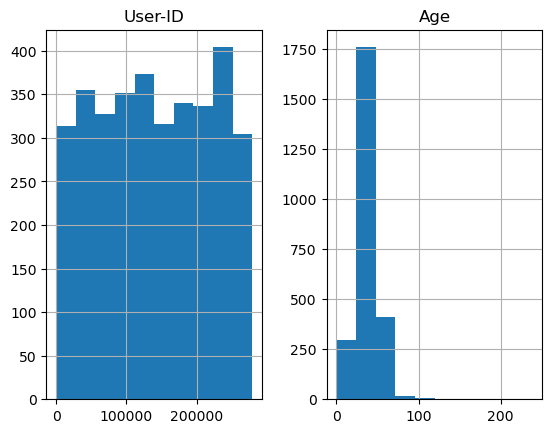

In [212]:
users_df.hist()
plt.show()

# drop the outlier 

In [15]:
mean = users_df['Age'].mean()
std = users_df['Age'].std()
cut_off = std * 3
lower, upper =np.abs( mean - cut_off), mean + cut_off
new_users_df = users_df[(users_df['Age'] < upper) & (users_df['Age'] > lower)]


In [16]:
print('upper value =',upper)
print('the lower value =',lower)

upper value = 77.97558744523982
the lower value = 5.454720671564054


In [9]:
mean = users_df['Age'].mean()
std = users_df['Age'].std()
cut_off = std * 3
lower, upper =np.abs( mean - cut_off)+1.5, mean + cut_off + 10
new_users_df = users_df[(users_df['Age'] < upper) & (users_df['Age'] > lower)]


In [18]:
new_users_df.isna().sum()

User-ID     0
Location    0
Age         0
dtype: int64

In [19]:
new_users_df.shape


(2477, 3)

In [10]:
users_df=new_users_df
users_df.shape

(2477, 3)

In [21]:
users_df.describe()

,User-ID,Age
count,2477.000000,2477.000000
mean,140574.071861,35.886556
std,78772.696454,11.801076
min,114.000000,9.000000
25%,74493.000000,27.000000
50%,139126.000000,34.000000
75%,208406.000000,43.000000
max,278843.000000,83.000000


In [ ]:
users_df.describe(include='object')

,Location
count,2477
unique,1571
top,"toronto, ontario, canada"
freq,35


# rating_df

In [141]:
rating_df.head()

,User-ID,ISBN,Book-Rating
0,277157,0312979517,5.0
1,277157,0345452550,7.0
2,277157,0399146504,7.0
3,277157,0399151451,7.0
4,277157,0425183181,5.0


In [142]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55976 entries, 0 to 55975
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   User-ID      55976 non-null  int64  
 1   ISBN         55976 non-null  object 
 2   Book-Rating  55976 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.3+ MB


In [5]:
rating_df=rating_df[rating_df['ISBN'].apply(is_valid_isbn)]

In [6]:
rating_df['ISBN']=rating_df['ISBN'].astype(int)

In [217]:
rating_df.describe()

,User-ID,ISBN,Book-Rating
count,51439.000000,5.143900e+04,51439.000000
mean,137151.346682,4.880051e+08,7.883571
std,80837.392991,2.765944e+08,1.750993
min,114.000000,7.154615e+06,1.000000
25%,68555.000000,3.454509e+08,7.000000
50%,135149.000000,4.409980e+08,8.000000
75%,208829.000000,5.535827e+08,9.000000
max,278843.000000,1.931562e+09,10.000000


In [9]:
rating_df.isna().sum()
# rating_df.shape

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [55]:
from sklearn.model_selection import train_test_split

# Assuming your main ratings DataFrame is called `ratings`
train_data, test_data = train_test_split(rating_df, test_size=0.2, random_state=42)


# feature eng

In [168]:
from sklearn.preprocessing import LabelEncoder

rating_df['User-ID'] = LabelEncoder().fit_transform(rating_df['User-ID'])

In [169]:
rating_df.sort_values(by='User-ID').head(10)

,User-ID,ISBN,Book-Rating
236,0,446612618,8.0
234,0,446608653,9.0
235,0,446612545,9.0
237,0,451208080,8.0
238,0,553584383,9.0
239,0,671027360,10.0
240,1,60915544,10.0
241,1,60977493,7.0
242,1,316601950,9.0
243,1,316776963,9.0


# Create the User-Item Matrix

# Expand Display in Pandas

In [7]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [8]:
user_item_matrix = rating_df.pivot_table(index='User-ID', columns='ISBN', values='Book-Rating')


In [9]:
user_item_matrix.head()

ISBN     7154615     20198817    20198906    20199600    20427859    \
User-ID                                                               
114             NaN         NaN         NaN         NaN         NaN   
243             NaN         NaN         NaN         NaN         NaN   
244             NaN         NaN         NaN         NaN         NaN   
254             NaN         NaN         NaN         NaN         NaN   
507             NaN         NaN         NaN         NaN         9.0   

ISBN     20442009    20442203    20442300    20442602    28604199    \
User-ID                                                               
114             NaN         NaN         NaN         NaN         NaN   
243             NaN         NaN         NaN         NaN         NaN   
244             NaN         NaN         NaN         NaN         NaN   
254             NaN         NaN         NaN         NaN         NaN   
507             NaN         NaN         NaN         NaN         NaN   

ISBN     28604202    60001453    60002050    60009241    60012781    \
User-ID                                                               
114             NaN         NaN         NaN         NaN         NaN   
243             NaN         NaN         NaN         NaN         NaN   
244             NaN         NaN         NaN         NaN         NaN   
254             NaN         NaN         NaN         NaN         NaN   
507             NaN         NaN         NaN         NaN         NaN   

ISBN     60080841    60083298    60083948    60085444    60085452    \
User-ID                                                               
114             NaN         NaN         NaN         NaN         NaN   
243             NaN         NaN         NaN         NaN         NaN   
244             NaN         NaN         NaN         NaN         NaN   
254             NaN         NaN         NaN         NaN         NaN   
507             NaN         NaN         NaN         NaN         NaN   

ISBN     60086246    60090375    60092645    60092963    60096195    \
User-ID                                                               
114             NaN         NaN         NaN         NaN         NaN   
243             NaN         NaN         NaN         NaN         NaN   
244             NaN         NaN         NaN         NaN         NaN   
254             NaN         NaN         NaN         NaN         NaN   
507             NaN         NaN         NaN         NaN         NaN   

ISBN     60168013    60173289    60175400    60175966    60184957    \
User-ID                                                               
114             NaN         NaN         NaN         NaN         NaN   
243             NaN         NaN         NaN         NaN         NaN   
244             NaN         NaN         NaN         NaN         NaN   
254             NaN         NaN         NaN         NaN         NaN   
507             NaN         NaN         NaN         NaN         NaN   

ISBN     60188731    60192119    60192704    60193395    60194790    \
User-ID                                                               
114             NaN         NaN         NaN         NaN         NaN   
243             NaN         NaN         NaN         NaN         NaN   
244             NaN         NaN         NaN         NaN         NaN   
254             NaN         NaN         NaN         NaN         NaN   
507             NaN         NaN         NaN         NaN         NaN   

ISBN     60198125    60198702    60199652    60248025    60256672    \
User-ID                                                               
114             NaN         NaN         NaN         NaN         NaN   
243             NaN         NaN         NaN         NaN         NaN   
244             NaN         NaN         NaN         NaN         NaN   
254             NaN         NaN         NaN         NaN         NaN   
507             NaN         NaN         NaN         NaN         NaN   

ISBN     6025673

In [10]:
user_item_matrix.fillna(0,inplace=True)

# Normalize by user mean
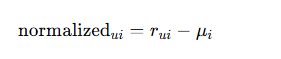
Centering ratings around 0 (removes scale bias)

In [11]:
# item meandf ech user
user_mean = user_item_matrix.mean(axis=1)

# Normalize by user mean
user_item_matrix_nor = user_item_matrix.sub(user_mean, axis=0)

In [221]:
user_item_matrix_nor.tail()

ISBN     7154615     20198817    20198906    20199600    20427859    \
User-ID                                                               
278418    -0.021856   -0.021856   -0.021856   -0.021856   -0.021856   
278535    -0.030813   -0.030813   -0.030813   -0.030813   -0.030813   
278582    -0.035829   -0.035829   -0.035829   -0.035829   -0.035829   
278633    -0.047653   -0.047653   -0.047653   -0.047653   -0.047653   
278843    -0.026514   -0.026514   -0.026514   -0.026514   -0.026514   

ISBN     20442009    20442203    20442300    20442602    28604199    \
User-ID                                                               
278418    -0.021856   -0.021856   -0.021856   -0.021856   -0.021856   
278535    -0.030813   -0.030813   -0.030813   -0.030813   -0.030813   
278582    -0.035829   -0.035829   -0.035829   -0.035829   -0.035829   
278633    -0.047653   -0.047653   -0.047653   -0.047653   -0.047653   
278843    -0.026514   -0.026514   -0.026514   -0.026514   -0.026514   

ISBN     28604202    60001453    60002050    60009241    60012781    \
User-ID                                                               
278418    -0.021856   -0.021856   -0.021856   -0.021856   -0.021856   
278535    -0.030813   -0.030813   -0.030813   -0.030813   -0.030813   
278582    -0.035829   -0.035829   -0.035829   -0.035829   -0.035829   
278633    -0.047653   -0.047653   -0.047653   -0.047653   -0.047653   
278843    -0.026514   -0.026514   -0.026514   -0.026514   -0.026514   

ISBN     60080841    60083298    60083948    60085444    60085452    \
User-ID                                                               
278418    -0.021856   -0.021856   -0.021856   -0.021856   -0.021856   
278535    -0.030813   -0.030813   -0.030813   -0.030813   -0.030813   
278582    -0.035829   -0.035829   -0.035829   -0.035829   -0.035829   
278633    -0.047653   -0.047653   -0.047653   -0.047653   -0.047653   
278843    -0.026514   -0.026514   -0.026514   -0.026514   -0.026514   

ISBN     60086246    60090375    60092645    60092963    60096195    \
User-ID                                                               
278418    -0.021856   -0.021856   -0.021856   -0.021856   -0.021856   
278535    -0.030813   -0.030813   -0.030813   -0.030813   -0.030813   
278582    -0.035829   -0.035829   -0.035829   -0.035829   -0.035829   
278633    -0.047653   -0.047653   -0.047653   -0.047653   -0.047653   
278843    -0.026514   -0.026514   -0.026514   -0.026514   -0.026514   

ISBN     60168013    60173289    60175400    60175966    60184957    \
User-ID                                                               
278418    -0.021856   -0.021856   -0.021856   -0.021856   -0.021856   
278535    -0.030813   -0.030813   -0.030813   -0.030813   -0.030813   
278582    -0.035829   -0.035829   -0.035829   -0.035829   -0.035829   
278633    -0.047653   -0.047653   -0.047653   -0.047653   -0.047653   
278843    -0.026514    8.973486   -0.026514   -0.026514   -0.026514   

ISBN     60188731    60192119    60192704    60193395    60194790    \
User-ID                                                               
278418    -0.021856   -0.021856   -0.021856   -0.021856   -0.021856   
278535    -0.030813   -0.030813   -0.030813   -0.030813   -0.030813   
278582    -0.035829   -0.035829   -0.035829   -0.035829   -0.035829   
278633    -0.047653   -0.047653   -0.047653   -0.047653   -0.047653   
278843    -0.026514   -0.026514   -0.026514   -0.026514   -0.026514   

ISBN     60198125    60198702    60199652    60248025    60256672    \
User-ID                                                               
278418    -0.021856   -0.021856   -0.021856   -0.021856   -0.021856   
278535    -0.030813   -0.030813   -0.030813   -0.030813   -0.030813   
278582    -0.035829   -0.035829   -0.035829   -0.035829   -0.035829   
278633    -0.047653   -0.047653   -0.047653   -0.047653   -0.047653   
278843    -0.026514   -0.026514   -0.026514   -0.026514   -0.026514   

ISBN     6025673

In [222]:
user_item_matrix_nor.index

Index([   114,    243,    244,    254,    507,    638,    805,    882,    929,
         1025,
       ...
       278137, 278188, 278194, 278202, 278390, 278418, 278535, 278582, 278633,
       278843],
      dtype='int64', name='User-ID', length=3422)

# Calculate Similarity
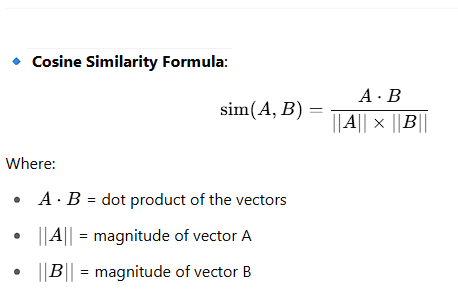

In [12]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
user_similarity_matrix= cosine_similarity(user_item_matrix_nor)
user_similarity_matrix

array([[ 1.        , -0.00243385, -0.00212819, ..., -0.00305811,
        -0.00356704, -0.00262007],
       [-0.00243385,  1.        ,  0.10755346, ..., -0.00347574,
         0.06108266, -0.00297788],
       [-0.00212819,  0.10755346,  1.        , ..., -0.00303923,
        -0.00354503, -0.0026039 ],
       ...,
       [-0.00305811, -0.00347574, -0.00303923, ...,  1.        ,
        -0.00509402, -0.00374167],
       [-0.00356704,  0.06108266, -0.00354503, ..., -0.00509402,
         1.        ,  0.0736075 ],
       [-0.00262007, -0.00297788, -0.0026039 , ..., -0.00374167,
         0.0736075 ,  1.        ]])

# Visualization
   ## user to user

In [13]:
user_similarity_df = pd.DataFrame(
    user_similarity_matrix,
    index=user_item_matrix_nor.index,  # user IDs
    columns=user_item_matrix_nor.index  # user IDs again
)


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the item similarity matrix
def plot_similarity(similarity_matrix_sampele):
    plt.figure(figsize=(10, 10))
    sns.heatmap(similarity_matrix_sampele, annot=True, cmap='coolwarm', xticklabels=True, yticklabels=True)
    plt.title("USERS TO USERS Cosine Similarity")
    plt.xlabel("USERS")
    plt.ylabel("USERS")
    plt.show()



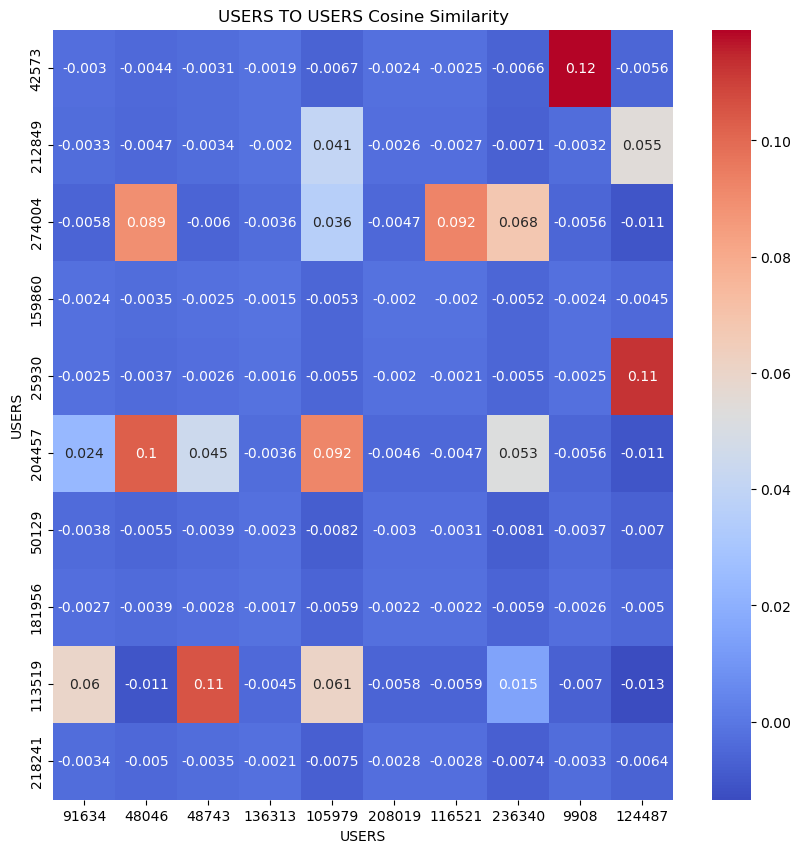

In [15]:


sample_users = user_similarity_df.sample(n=10, axis=0).sample(n=10, axis=1)

plot_similarity(sample_users)


item  to item 

In [16]:
items_similarity_matrix = cosine_similarity(user_item_matrix_nor.T)


In [17]:
similarity_df_item =pd.DataFrame(
    items_similarity_matrix,
    index=user_item_matrix.columns,
    columns=user_item_matrix.columns
)

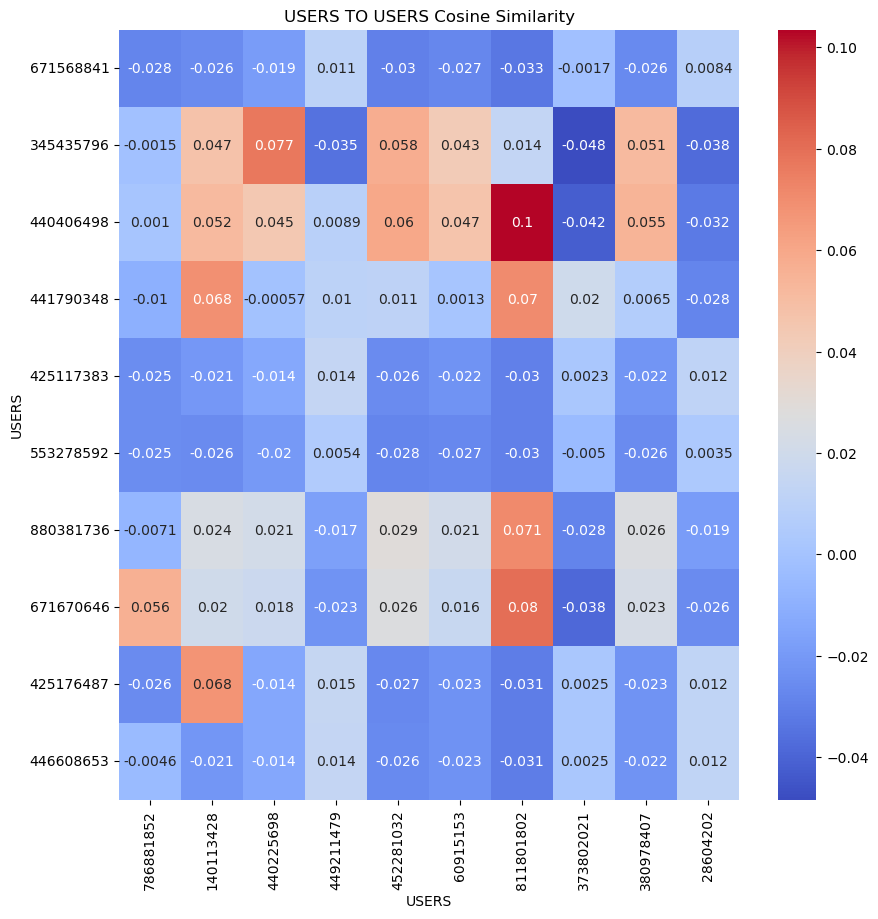

In [18]:
sample_items=similarity_df_item.sample(n=10,axis=0).sample(n=10,axis=1)
plot_similarity(sample_items)

# Clustered Heatmap

  #  item to item 

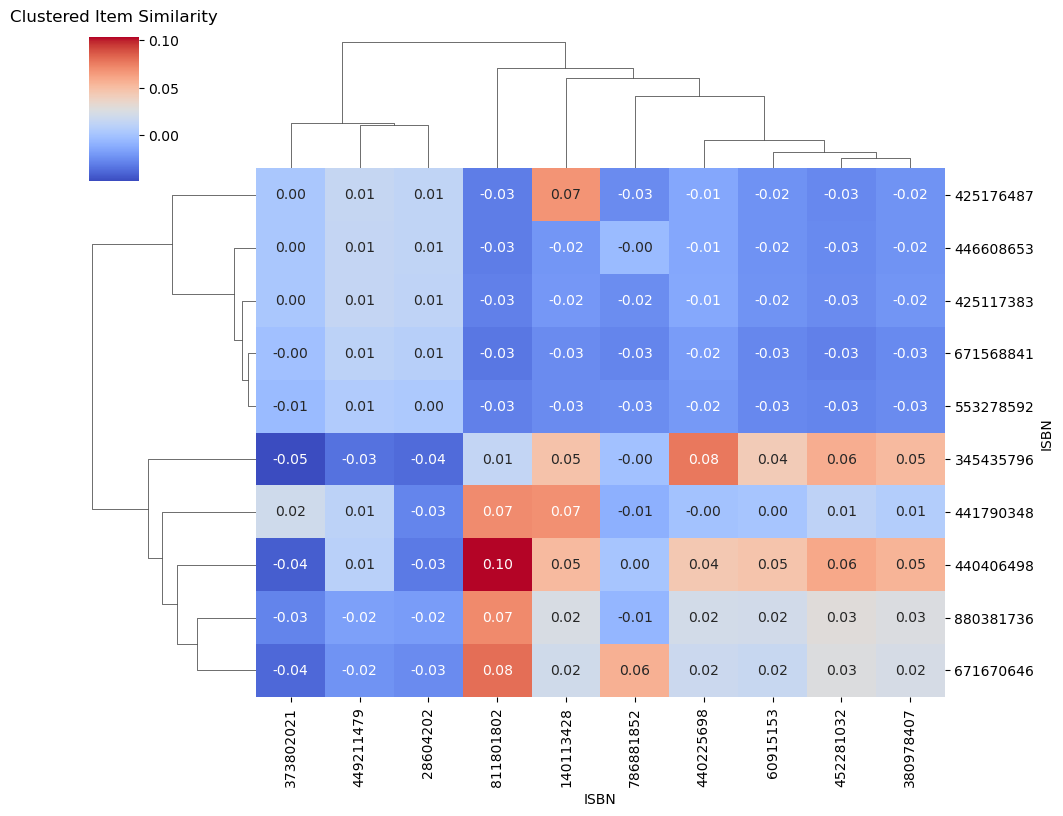

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Clustered heatmap with annotations (numbers)
sns.clustermap(
    sample_items,  
    cmap="coolwarm",
    annot=True,         
    fmt=".2f",          
    figsize=(10, 8)
)

plt.title("Clustered Item Similarity", y=1.05)
plt.show()


   # user to user 

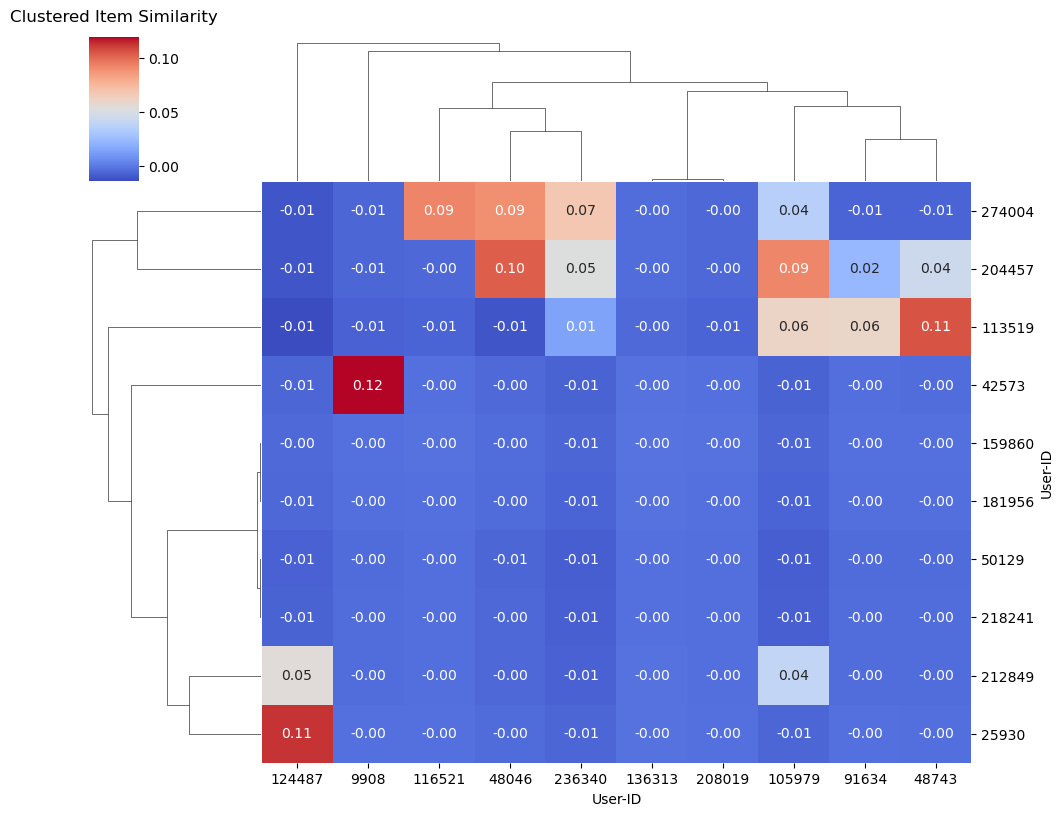

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Clustered heatmap with annotations (numbers)
sns.clustermap(
    sample_users,  
    cmap="coolwarm",
    annot=True,         
    fmt=".2f",          
    figsize=(10, 8)
)
plt.title("Clustered Item Similarity", y=1.05)
plt.show()

#  test
target_user =114 

In [21]:
target_user =114 

similar_users = user_similarity_df[target_user]
similar_users_sorted=similar_users.sort_values(ascending=False)

print(similar_users_sorted.head(10))


User-ID
114       1.000000
24995     0.356522
217107    0.274577
128332    0.263043
80516     0.247340
86969     0.235069
204622    0.234177
237264    0.233295
198046    0.228185
81484     0.221731
Name: 114, dtype: float64


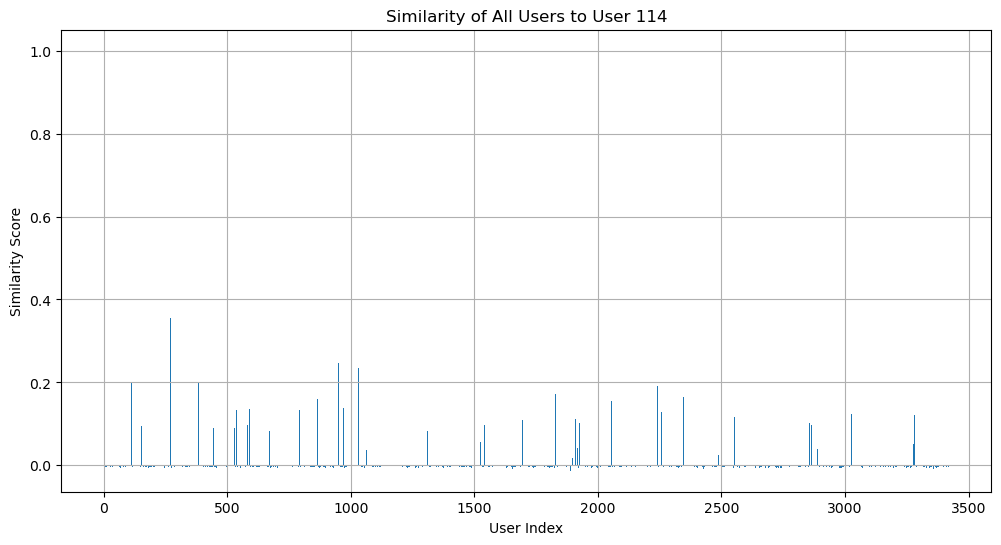

In [22]:
# Assume user_similarities is already defined
plt.figure(figsize=(12,6 ))

plt.bar(range(len(similar_users)), similar_users)
plt.title("Similarity of All Users to User 114")
plt.xlabel("User Index")
plt.ylabel("Similarity Score")
plt.grid(True)
plt.show()

In [23]:
similar_users_sorted.head()

User-ID
114       1.000000
24995     0.356522
217107    0.274577
128332    0.263043
80516     0.247340
Name: 114, dtype: float64

In [24]:
[str(u) for u in similar_users_sorted.index[:10]]
similar_users_sorted.values

array([ 1.        ,  0.35652176,  0.27457653, ..., -0.01297548,
       -0.01300878, -0.0130372 ])

# find_similar_users funcation

In [26]:
def find_similar_users_df(ratings, target_user, k=5):
    """
    Finds the top K similar users to the target user based on cosine similarity.

    :param ratings: A user-item matrix (DataFrame) where rows are users and columns are items.
    :param target _user: The user ID for whom we are finding similar users.
    :param k: Number of similar users to return.
    :return: DataFrame with similar user IDs and their similarity scores.
    """
    # Compute similarity between users
    similarity_matrix = cosine_similarity(ratings)
    
    # Get target user's index
    target_user_index = ratings.index.get_loc(target_user)
    
    # Get similarity scores for the target user
    user_similarities = similarity_matrix[target_user_index]
    
    # Sort users by similarity (excluding target user itself)
    sorted_users = np.argsort(-user_similarities)[1:k+1]  # Skip first (self)
    
    # Create DataFrame with user IDs and similarity scores
    top_k_users = pd.DataFrame({
        'user_id': ratings.index[sorted_users],
        'similarity': user_similarities[sorted_users]
        })

    return top_k_users


In [27]:
find_similar_users_df(user_item_matrix_nor,114,5)

,user_id,similarity
0,24995,0.356522
1,217107,0.274577
2,128332,0.263043
3,80516,0.247340
4,86969,0.235069


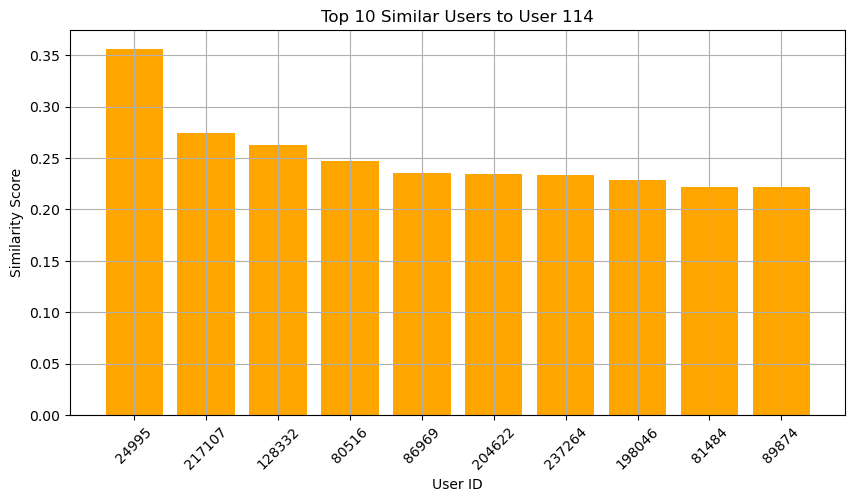

In [28]:
import matplotlib.pyplot as plt

# Ensure 'similar_users_sorted' is correctly defined
similar_users_sorted = find_similar_users_df(user_item_matrix_nor, target_user=114, k=10)

# Plot similarity scores
plt.figure(figsize=(10, 5))
plt.bar(similar_users_sorted["user_id"].astype(str), similar_users_sorted["similarity"], color='orange')
plt.title("Top 10 Similar Users to User 114")
plt.xlabel("User ID")
plt.ylabel("Similarity Score")
plt.xticks(rotation=45)  # Rotate for better visibility
plt.grid(True)
plt.show()


In [29]:
def find_similar_users_list(ratings, target_user, k=5):

    similarity_matrix = cosine_similarity(ratings)
    target_user_index = ratings.index.get_loc(target_user)
    user_similarities = similarity_matrix[target_user_index]
    
    # Get indices of top K similar users (excluding self)
    similar_indices = np.argsort(-user_similarities)[1:k+1]
    
    # Return the user IDs
    return ratings.index[similar_indices].tolist()

# geting the books 

In [31]:
similar_u=find_similar_users_list(user_item_matrix_nor,24995,10)

In [32]:
unrated_books = user_item_matrix.loc[24995].isna()
top_5_recomended_books=[]
for user in similar_u:  
    user_ratings = user_item_matrix_nor.loc[user] 
    iSBN_BOOK=user_ratings[user_ratings > 0 ].index[0]
    if iSBN_BOOK in unrated_books:
        top_5_recomended_books.append(iSBN_BOOK)

In [33]:
top_5_recomended_books

[142003727,
 345417623,
 446608653,
 142001740,
 61093491,
 60938455,
 312305060,
 66214122,
 60740450,
 60519134]

# final recommend_k_books fucation

In [41]:
def recommend_k_books(ratings, target_user, similar_users, zeros_matrix, k=5):
    """
    Recommends K books for a target user based on ratings from similar users.

    :param ratings: Normalized user-item matrix.
    :param target_user: ID of the user to recommend books for.
    :param similar_users: List of similar user IDs.
    :param zeros_matrix: Original user-item matrix (with zeros or NaNs).
    :param k: Number of books to recommend.
    :return: List of recommended ISBNs.
    """
    # Get books that the target user hasn't rated
    unrated_books = zeros_matrix.loc[target_user][zeros_matrix.loc[target_user] == 0].index
    recommended_books = []

    for user in similar_users:
        user_ratings = ratings.loc[user]
        high_rated_books = user_ratings[user_ratings > .2].index

        for isbn in high_rated_books:
            if isbn in unrated_books and isbn not in recommended_books:
                recommended_books.append(isbn)
                if len(recommended_books) >= k:
                    return recommended_books

    return recommended_books


In [40]:
similar_u = find_similar_users_list(user_item_matrix_nor, 24995, k=10)
top_books = recommend_k_books(user_item_matrix_nor, 24995, similar_u, user_item_matrix, k=10)
print(top_books)


[142003727, 345438329, 440241073, 446672211, 345417623, 385504209, 767915062, 446608653, 446612618, 451208080]


 # predict a rating
 option 1 
 Averages the ratings from similar users

In [42]:
def predict_rating_simple(ratings,isbn, similar_users):
    total = 0  
    count = 0  

    for user in similar_users:
        total += ratings.loc[user,isbn]
        count += 1
# get the average
    if count == 0:
        return 0  

    average_rating = total / count  # get the average
    return average_rating


# weighted average
op2:using a weighted average of ratings from other similar users.
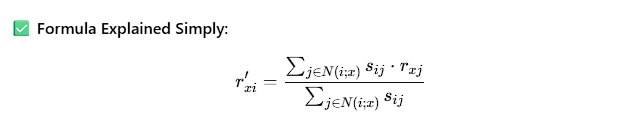

 Why "weighted"?
Because we don’t treat all similar users equally. If a user is more similar to the target user, their rating has more influence.



In [43]:
def predict_rating_weighted(ratings, isbn, similar_users, user_similarities):
    weighted_sum = 0
    total_weight = 0

    for user , sim in zip( similar_users,range(0,len(similar_users)+1)):
        rating=ratings.loc[user,isbn]
        similarity=user_similarities[sim]

        weighted_sum += rating *similarity
        total_weight += similarity



    if total_weight == 0:
        return 0

    return weighted_sum / total_weight


# try the predection 
user=1 book =20198906

In [50]:
similar_u_df = find_similar_users_df(user_item_matrix_nor, 24995, k=10)
similar_u_df

,user_id,similarity
0,31412,0.389120
1,81484,0.375110
2,114,0.356522
3,242528,0.331609
4,217107,0.285817
5,192119,0.275920
6,53456,0.262178
7,209875,0.246250
8,128332,0.246194
9,80516,0.231509


# RMSE

In [62]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def evaluate_predictions(ratings_matrix, test_df, k=5):
    predictions = []
    truths = []

    # Precompute similarity matrix
    similarity_matrix = cosine_similarity(ratings_matrix)
    similarity_df = pd.DataFrame(similarity_matrix, index=ratings_matrix.index, columns=ratings_matrix.index)

    # Filter only rows where user and isbn exist in matrix
    test_df = test_df[test_df['User-ID'].isin(ratings_matrix.index) & test_df['ISBN'].isin(ratings_matrix.columns)]

    for _, row in test_df.iterrows():
        user = row['User-ID']
        isbn = row['ISBN']
        true_rating = row['Book-Rating']

        # Get similar users and their similarities
        if user in ratings_matrix.index and isbn in ratings_matrix.columns:
            similarities = similarity_df.loc[user].copy()
            similarities.drop(user, inplace=True)  # remove self
            similar_users = similarities.sort_values(ascending=False).head(k)

            weighted_sum = 0
            sim_sum = 0

            for sim_user, sim_score in similar_users.items():
                rating = ratings_matrix.at[sim_user, isbn]
                if rating > 0:
                    weighted_sum += sim_score * rating
                    sim_sum += sim_score

            if sim_sum == 0:
                predicted_rating = 0
            else:
                predicted_rating = weighted_sum / sim_sum

            predictions.append(predicted_rating)
            truths.append(true_rating)

    # Compute RMSE
    if predictions:
        rmse = np.sqrt(mean_squared_error(truths, predictions))
        return rmse
    else:
        return None


In [88]:
small_test = test_data[['User-ID', 'ISBN', 'Book-Rating']].sample(100, random_state=42)
rmse = evaluate_predictions(user_item_matrix_nor, small_test, k=5)
print(f"RMSE: {rmse:.4f}")


RMSE: 5.7817


An RMSE of 5.78 is quite high, considering that typical book ratings are on a scale from 0 to 10 (or sometimes 1 to 10). This likely means your predictions are far from the actual ratings in many cases.